In [7]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt
import time

from inputs import *

MECH_PATH = "ar22.yaml"
gas = ct.Solution(MECH_PATH)

T_u  = T_30
P_u  = P_30
fuel = 'CH4'
air  = {'O2':1.0, 'N2':3.76}
phi  = 0.46

gas.TP = T_u, P_u
gas.set_equivalence_ratio(phi, fuel, air)

width = 0.015     # m
flame = ct.FreeFlame(gas, width=width)
flame.set_refine_criteria(ratio=3, slope=0.1, curve=0.1)


t0 = time.time()
flame.solve(loglevel=0, auto=True)
t1 = time.time()
ctime = t1 - t0

S_L = flame.velocity[0]   # m/s
print("Flame Speed is: {:.2f} cm/s. Simulation took {:.2f} s".format(S_L*100., ctime))

phi = 0.46   # example: lean case, set this to what you actually want

import numpy as np

# Extract spatial grid (m) and temperature (K) from the solution
x = flame.grid      # [m]
T = flame.T         # [K]

# Upstream/unburnt and downstream/burnt temperatures
T_u_sim = T[0]      # should be close to T_u
T_b = T[-1]         # approximately adiabatic flame temperature

print(f"Unburnt T from solution: {T_u_sim:.1f} K")
print(f"Burnt T from solution:   {T_b:.1f} K")

# Compute temperature gradient dT/dx using numpy
dTdx = np.gradient(T, x)          # [K/m]

# Find maximum magnitude of the gradient
max_grad = np.max(np.abs(dTdx))   # [K/m]

# Define flame thickness
delta_f = (T_b - T_u) / max_grad  # [m]

print(f"Laminar flame speed S_L = {S_L:.4f} m/s")
print(f"Flame thickness δ_f      = {delta_f*1000:.3f} mm")


Flame Speed is: 8.02 cm/s. Simulation took 1.09 s
Unburnt T from solution: 750.0 K
Burnt T from solution:   1772.8 K
Laminar flame speed S_L = 0.0802 m/s
Flame thickness δ_f      = 0.140 mm


In [8]:
# Example numbers – replace with your actual design values
U = 180          # mean exit velocity [m/s]
I = 0.035          # turbulence intensity = 10% (example)

u_prime = I * U   # fluctuation velocity [m/s]

print(f"Mean velocity U    = {U:.2f} m/s")
print(f"Turbulence intensity I = {I*100:.1f} %")
print(f"Turbulent velocity u'  = {u_prime:.2f} m/s")

D = 0.04          # nozzle diameter [m]
C_l = 0.1         # example coefficient (depends on design / lecture guidance)

l_t = C_l * D     # integral length scale [m]

print(f"Nozzle diameter D  = {D:.3f} m")
print(f"Integral length lt = {l_t*1000:.2f} mm")

Mean velocity U    = 180.00 m/s
Turbulence intensity I = 3.5 %
Turbulent velocity u'  = 6.30 m/s
Nozzle diameter D  = 0.040 m
Integral length lt = 4.00 mm


lt / δf  = 2.85e+01
u' / S_L = 7.85e+01


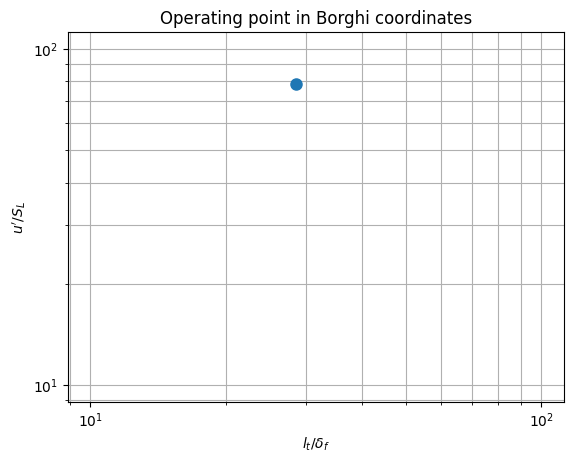

In [9]:
import matplotlib.pyplot as plt

# From previous steps:
# S_L     [m/s]
# delta_f [m]
# u_prime [m/s]
# l_t     [m]

lt_over_delta = l_t / delta_f
u_over_Sl     = u_prime / S_L

print(f"lt / δf  = {lt_over_delta:.2e}")
print(f"u' / S_L = {u_over_Sl:.2e}")

fig, ax = plt.subplots()

# Plot your operating point
ax.loglog(lt_over_delta, u_over_Sl, 'o', markersize=8)

ax.set_xlabel(r'$l_t / \delta_f$')
ax.set_ylabel(r"$u' / S_L$")
ax.set_title("Operating point in Borghi coordinates")
ax.grid(True, which='both')

plt.show()